In [27]:
import numpy as np
import pandas as pd	
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [28]:

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

y_pred = model.predict(X_test)
accuracy_score(y_test, np.argmax(y_pred, axis=-1))

Epoch 1/60


c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7000 - loss: 0.9577 - val_accuracy: 0.8256 - val_loss: 0.5098
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8274 - loss: 0.4969 - val_accuracy: 0.8420 - val_loss: 0.4396
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8405 - loss: 0.4492 - val_accuracy: 0.8446 - val_loss: 0.4348
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.4071 - val_accuracy: 0.8528 - val_loss: 0.4121
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3910 - val_accuracy: 0.8618 - val_loss: 0.3871
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8680 - loss: 0.3747 - val_accuracy: 0.8594 - val_loss: 0.3872
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3651 - val_accuracy: 0.8568 - val_loss: 0.3905
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8783 - loss: 0.3443 - val_accurac

0.8916

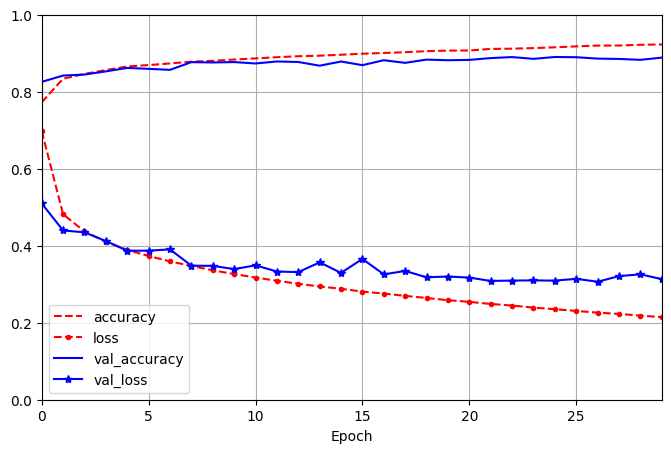

In [30]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()